<a href="https://colab.research.google.com/github/otoperalias/Coyuntura/blob/main/clases/Tema3_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tema 3.2. Desestacionalización (I)
Leer las diapositivas disponibles en el Aula Virtual antes de ejecutar este código.

In [ ]:
# Paso preliminar: instalar la última versión de statsmodels, que en colab no está por defecto bien actualizada (al menos a fecha de hoy 20/10/21)
!pip install statsmodels==0.13.0 # current stable version
# Como se indica en el mensaje, a que clicar en RESTAT RUNTIME

In [1]:
#Importamos algunas librerías y datos
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
series = pd.read_csv('https://raw.githubusercontent.com/otoperalias/Coyuntura/main/clases/datos/airline-passengers.csv', header=0, index_col=0, parse_dates=True)
series

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
# Representar la serie
series.plot()

#### Descomposición clásica

In [ ]:
# Ejemplo descomposición aditiva
result_ad = sm.tsa.seasonal_decompose(series, model="additive")
result_ad.plot()
plt.show()

In [ ]:
# Ejemplo de descomposición multiplicativa
result = sm.tsa.seasonal_decompose(series, model='multiplicative')
result.plot()
plt.show()

#### Descomposición STL

In [ ]:
# Echar un vistazo a la página de ayuda:
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.STL.html#statsmodels.tsa.seasonal.STL

#Ahora aplicamos el nuevo método a la serie de pasajeros de aerolíneas
result = sm.tsa.STL(series).fit() 
result.plot()
plt.show()

In [ ]:
# Para reducir la influencia de los valores atípicos, se añade el argumento robust (no siempre es mejor o conveniente):
result = sm.tsa.STL(series, robust=True).fit() 
result.plot()
plt.show()

#### Material adicional:

Para profundizar en vuestros conocimientos, echad un vistazo a este gran recurso disponible en la web:  
http://www.chadfulton.com/topics/002-seasonal-adjustment.html

#### Ejemplo con datos de afiliaciones a la Seguridad Social

Fuente:  
https://www.seg-social.es/wps/portal/wss/internet/EstadisticasPresupuestosEstudios/Estadisticas/EST8/2341/2342

Los datos a usar están disponibles aquí:  
https://github.com/otoperalias/Coyuntura/blob/main/clases/datos/series_seg_social.xlsx  
Se pueden importar directamente, sin necesidad de descargarlos en vuestro equipo. Para ello, debéis usar este enlace:  
https://raw.githubusercontent.com/otoperalias/Coyuntura/main/clases/datos/series_seg_social.xlsx  
No obstante, la primera que lo uséis es bueno descargar el archivo y echar un vistazo a los datos y así, entre otras cosas, ver si hay alguna columna para usar como index de la tabla, si esa columna se puede interpretar como fechas por ```pandas```, etc..


In [2]:
# Importamos los datos
ss=pd.read_excel("https://raw.githubusercontent.com/otoperalias/Coyuntura/main/clases/datos/series_seg_social.xlsx",
                 index_col=3, parse_dates=True)
ss

,Periodo,año,mes,afiliados
period,,,,
2001-01-01,Enero 2001,2001,1,15194299.22
2001-02-01,Febrero 2001,2001,2,15326583.35
2001-03-01,Marzo 2001,2001,3,15455386.40
2001-04-01,Abril 2001,2001,4,15551821.04
2001-05-01,Mayo 2001,2001,5,15688072.27
...,...,...,...,...
2020-06-01,Junio 2020,2020,6,18624336.68
2020-07-01,Julio 2020,2020,7,18785554.30
2020-08-01,Agosto 2020,2020,8,18792376.14


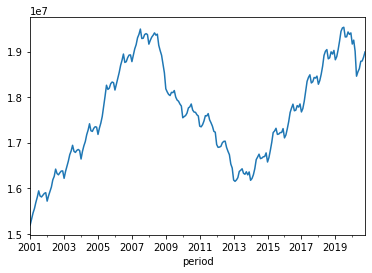

In [3]:
ss["afiliados"].plot()

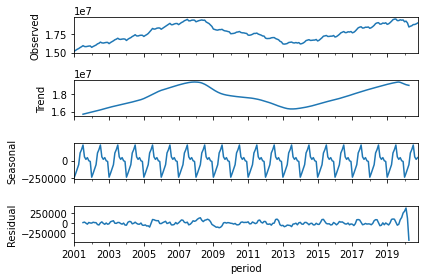

In [4]:
# Descomposición clásica aditiva
result = sm.tsa.seasonal_decompose(ss["afiliados"], model="additive")
result.plot()
plt.show()

In [ ]:
# Descomposición clásica multiplicativa
result = sm.tsa.seasonal_decompose(ss["afiliados"], model="multiplcative")
result.plot()
plt.show()

In [ ]:
# Descomposición STL
result = sm.tsa.STL(ss["afiliados"], robust=True).fit() 
result.plot()
plt.show()

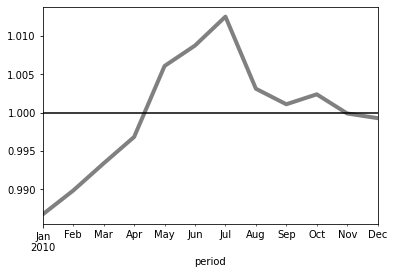

In [5]:
# Gráfico para ver en qué meses hay más y menos afiliados
result = sm.tsa.seasonal_decompose(ss["afiliados"], model="multiplcative")
fig,ax=plt.subplots()
result.seasonal["2010"].plot(ax=ax,color="grey",linewidth=4) # da igual el año que se elija (siempre igual)
ax.axhline(1,color="black")
plt.show()

In [15]:
# GRÁFICO MÁS PROFESIONAL
# a. Preparamos los datos
import numpy as np
result = sm.tsa.seasonal_decompose(ss["afiliados"], model="multiplcative")
df=(result.seasonal["2010"]-1)*100  # da igual el año que se elija (siempre igual)
meses_num=np.arange(0,12)
meses=["Ene","Feb","Mar","Abr","Mayo","Jun","Jul","Ago","Sep","Oct","Nov","Dec"]

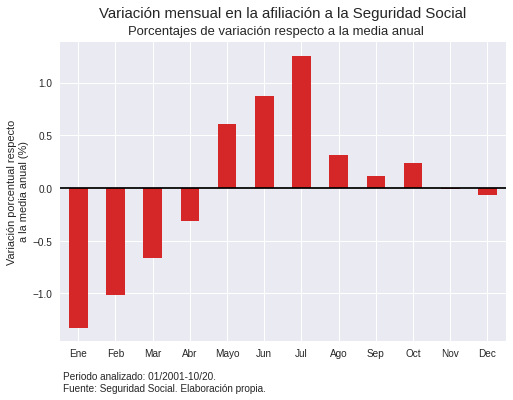

In [32]:
# a. Creamos el gráfico
plt.style.use('seaborn')
fig,ax=plt.subplots()
df.plot.bar(ax=ax,color="tab:red")
ax.set_xticks(meses_num)
ax.set_xticklabels(meses, rotation='horizontal')
ax.axhline(0,color="black")
ax.set_ylabel("Variación porcentual respecto\n a la media anual (%)")
ax.set_xlabel("")
ax.set_title("Variación mensual en la afiliación a la Seguridad Social", size=15, pad=25)
fig.text(0.5,0.9,"Porcentajes de variación respecto a la media anual", size=13,ha="center")
fig.text(0.13,0,"Periodo analizado: 01/2001-10/20.\nFuente: Seguridad Social. Elaboración propia.")
plt.show()

In [27]:
ss


,Periodo,año,mes,afiliados
period,,,,
2001-01-01,Enero 2001,2001,1,15194299.22
2001-02-01,Febrero 2001,2001,2,15326583.35
2001-03-01,Marzo 2001,2001,3,15455386.40
2001-04-01,Abril 2001,2001,4,15551821.04
2001-05-01,Mayo 2001,2001,5,15688072.27
...,...,...,...,...
2020-06-01,Junio 2020,2020,6,18624336.68
2020-07-01,Julio 2020,2020,7,18785554.30
2020-08-01,Agosto 2020,2020,8,18792376.14
